In [1]:
import folium

In [2]:
from folium import plugins

In [6]:
plugins.MarkerCluster?


In [3]:
import geopandas as gpd

In [4]:
folium.__version__


'0.5.0'

In [8]:
import sys
sys.prefix

'/home/rick/anaconda2/envs/gis-test'

In [7]:
# make notebook of steps to get to here for SMU

*SMU_workshop*
start w/ catchments, full
get centroids
plot
get NARS data
make shp from  csv
heatmap from NARS of NO3

plot together with mike's catchment summarizations

2 NBs one that shows the analysis, the other steps through it
    * analysis just shows folium output along with explanations
    * steps NB shows:
        * DL NARS all
        * print tables ( cmd line )
        * access to envs through User local, 
CREATE --
    instruction in Anacona NB on Anaconda 

#! DL github repo -- extract/navigate cmd to there

SETUP --
    DL Anaconda -- use curl??
    install -- figure commands  for install
    
RUN --
    conda info -- ?? where does conda envs install -- python version 2.7.12.final.0!
    conda add channel ioos
    conda create -n gis jupyter geopandas folium spyder
    ####### should prompt for Y, hit enter
    activate gis
#! LEAVE WINDOWS OPEN
BEGIN --
    show abspath in cell -- explain how relativ/abs differ
    DL NARS data -- extract inside 2018_GIS_workshop
   
   

# SETUP --


### Download [Anaconda](https://www.anaconda.com/download)

### Download [2018_GIS_workshop](https://github.com/debboutr/2018_GIS_workshop)

** steps for anaconda install **

DL [NARS data]() do Ctrl + F here a search for 'all' then arrow down to:
    
   **| Survey | Indicator | Data | Metadata |**
   
   **| Streams 2004-2005 | All | WSA All Data (ZIP)(1 pg, 7 MB) | |**
   
### click the '.zip' link for a folder of all tables

### open spyder w/ 'super' key  #! navigate to 
### open in cmd w/ spyder --new-instance


print tree of local dir

#### Examine NARS table data

In [10]:
import os
import pandas as pd
folder = 'data/nars'
for f in os.listdir('./%s' % folder):  # loop through every file in a given directory
    if f.split('.')[-1] == 'csv':  # find only CSV's
#         print '*************************'
#         print f
        if f.split('.')[0] == 'wsa_siteinfo_ts_final':  # load NARS site info into a pandas DataFrame
            sites = pd.read_csv('{}/{}'.format(folder,f))

In [11]:
pd.options.display.max_columns # what is this otherwise? default -- 20 

20

In [12]:
# pd.options.display.max_columns = None  # this can be used to display more columns than default
sites.head()
# sites.columns

SITE_ID  YEAR  VISIT_NO                 SITENAME  SITETYPE REPEAT  \
0  1993SBOIA049  2004         1             LITTLE JACKS  WESTHAND          
1  1995SBOIC020  2004         1         TWENTYMILE CREEK  WESTHAND          
2  1995SPOCA003  2004         1         BELL MARSH CREEK  WESTHAND          
3  1997SBOIA019  2004         1  SECOND FORK SQUAW CREEK  WESTHAND          
4  1997SBOIB071  2004         1             DAGGER CREEK  WESTHAND          

      LON_DD    LAT_DD     XLON_DD   XLAT_DD  \
0 -116.10283  42.73022  -116.10283  42.73022   
1 -115.98106  45.13492  -115.98106  45.13492   
2 -112.28350  42.68706   -112.2835  42.68706   
3 -116.23931  44.34630  -116.23931   44.3463   
4 -115.32360  44.47557   -115.3236  44.47557   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                            NAECO2_NM NAECO1               ECOREPORT HUC2  \
0  WESTERN INTERIOR BASINS AND RANGES     10  NORTH AMERICAN DESERTS   17   
1                  WESTERN CORDILLERA      6      WESTERN CORDILLERA   17   
2  WESTERN INTERIOR BASINS AND RANGES     10  NORTH AMERICAN DESERTS   17   
3                  WESTERN CORDILLERA      6      WESTERN CORDILLERA   17   
4                  WESTERN CORDILLERA      6      WESTERN CORDILLERA   17   

   HUC4    HUC6      HUC8                   HUC8_NM IM_FLAG  \
0  1705  170501  17050102                   BRUNEAU           
1  1705  170501  17050123        NORTH FORK PAYETTE           
2  1704  170402  17040208                  PORTNEUF           
3  1705  170501  17050122                   PAYETTE           
4  1706  170602  17060205  UPPER MIDDLE FORK SALMON           

                                         IM_COMMENT   
0  INTERBASIN TRANSFER-WSAREA VALUE IS FOR LOCAL ...  
1                                                     
2                                                     
3                                                     
4                                                     

[5 rows x 61 columns]

In [14]:
chem = pd.read_csv('{}/waterchemistry.csv'.format(folder))
print(chem.columns) #.tolist()
chem = chem.loc[(chem.SAMPLED == 'Yes'),:]

Index(['SITE_ID', 'YEAR', 'VISIT_NO', 'SAMPLED', 'DATE_COL', 'DATECHEM',
       'TEAM_ID', 'SAMP_LOC', 'PHSTVL', 'PHSTVLF', 'COND', 'CONDF', 'ANC',
       'ANCF', 'TURB', 'TURBF', 'TSS', 'TSSF', 'COLOR', 'COLORF', 'DOC',
       'DOCF', 'DIC', 'DICF', 'PTL', 'PTLF', 'SE', 'SEF', 'CA', 'CAF', 'MG',
       'MGF', 'NA', 'NAF', 'K', 'KF', 'NH4', 'NH4F', 'SO4', 'SO4F', 'NO3',
       'NO3F', 'CL', 'CLF', 'NTL', 'NTLF', 'ZN', 'ZNF', 'SIO2', 'SIO2F', 'H',
       'OH', 'HCO3', 'CO3', 'ALKCALC', 'CATSUM', 'ANSUM', 'ANDEF', 'SOBC',
       'IONSTR', 'BALANCE', 'ORGION', 'CONCAL', 'CONDHO', 'DAY_SHIP',
       'COM_LAB', 'COM_FLD', 'COM_IM '],
      dtype='object')


In [15]:
chem.DATE_COL.equals(tbl.DATE_COL) # dates don't match up between site visits for different tables???

False

In [16]:
pd.options.display.max_rows

60

In [17]:
# pd.options.display.max_rows = 47
# chem = chem [['SITE_ID','NO3', 'NH4', 'NTL']]
sites.drop_duplicates('SITE_ID', inplace=True)
sites = pd.mersitese(sites, chem, on='SITE_ID')
sites.head()

SITE_ID  YEAR_x  VISIT_NO_x                SITENAME  SITETYPE REPEAT  \
0  IAW02344-0096    2004           1           BEAVER BRANCH  EASTPROB      Y   
1  IAW02344-0097    2004           1  WEST NISHNABOTNA RIVER  EASTPROB      Y   
2  IAW02344-0098    2004           1   UNN TRIB. OTTER CREEK  EASTPROB      Y   
3  IAW02344-0099    2004           1            LIZARD CREEK  EASTPROB      Y   
4  IAW02344-0100    2004           1              BELL CREEK  EASTPROB          

      LON_DD     LAT_DD    XLON_DD   XLAT_DD             ...               \
0 -94.089731  41.950878  -94.08996  41.95086             ...                
1 -95.400885  41.332723  -95.40079  41.33257             ...                
2 -91.922940  42.702540  -91.92313  42.70254             ...                
3 -94.339160  42.537422  -94.33945  42.53732             ...                
4 -91.672783  42.979807  -91.67287  42.97979             ...                

      SOBC IONSTR BALANCE ORGION  CONCAL  CONDHO DAY_SHIP COM_LAB COM_FLD  \
0  6917.88  0.017   -0.37     26  784.47  730.32        2                   
1  6520.71  0.017   -0.77  17.69  730.72  656.72        1                   
2   5656.6  0.015      -1  22.68  658.34  598.98        5                   
3  6289.07  0.017    0.33  34.01  724.82  630.13        2                   
4  6950.22  0.018   -0.49   19.9  747.38  683.43        2                   

                       COM_IM   
0  NO FIELD FORMS FOR VISIT 1   
1                               
2                               
3                               
4                               

[5 rows x 128 columns]

In [8]:
print(len(tbl))
print(len(chem))
print(len(g))

1842
1391
1391


In [12]:
len(chem.SITE_ID.unique())

1392

In [13]:
len(tbl.SITE_ID.unique()) # extract unique SITE_IDs!!

1842

In [18]:
g.plot??

<IPython.core.display.Javascript object>


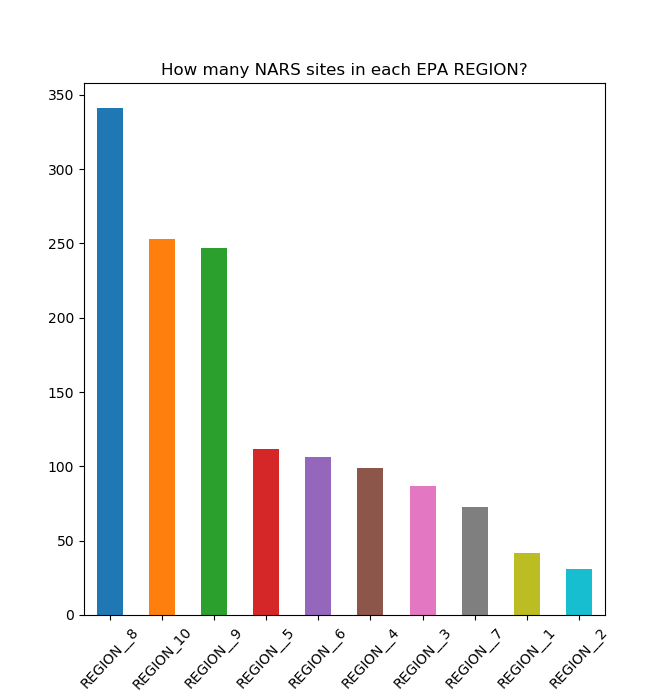

In [19]:
%matplotlib notebook 
g['EPAREGION'].value_counts().plot(kind='bar', title="How many NARS sites in each EPA REGION?", figsize=(4,3), rot=47)

#### What is an [EPA REGION](https://www.epa.gov/aboutepa/visiting-regional-office)??

In [ ]:
#shouldn't be needed
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')

In [15]:
g.head()

SITE_ID  YEAR  VISIT_NO                SITENAME  SITETYPE REPEAT  \
0  IAW02344-0096  2004         1           BEAVER BRANCH  EASTPROB      Y   
1  IAW02344-0097  2004         1  WEST NISHNABOTNA RIVER  EASTPROB      Y   
2  IAW02344-0098  2004         1   UNN TRIB. OTTER CREEK  EASTPROB      Y   
3  IAW02344-0099  2004         1            LIZARD CREEK  EASTPROB      Y   
4  IAW02344-0100  2004         1              BELL CREEK  EASTPROB          

      LON_DD     LAT_DD    XLON_DD   XLAT_DD  ...   HUC2  HUC4    HUC6  \
0 -94.089731  41.950878  -94.08996  41.95086  ...      7   710   71000   
1 -95.400885  41.332723  -95.40079  41.33257  ...     10  1024  102400   
2 -91.922940  42.702540  -91.92313  42.70254  ...      7   708   70801   
3 -94.339160  42.537422  -94.33945  42.53732  ...      7   710   71000   
4 -91.672783  42.979807  -91.67287  42.97979  ...      7   706   70600   

       HUC8             HUC8_NM IM_FLAG IM_COMMENT      NO3  NH4    NTL  
0   7100004   MIDDLE DES MOINES                      1554.6  1.5  23300  
1  10240002    WEST NISHNABOTNA                       595.2  0.7   8644  
2   7080102  UPPER WAPSIPINICON                       663.2  4.4   9838  
3   7100004   MIDDLE DES MOINES                       132.4  1.7   2214  
4   7060004              TURKEY                       348.9  0.9   5288  

[5 rows x 64 columns]

In [18]:
g[['LON_DD','LAT_DD']].head()  # use these columns for point geometry

LON_DD     LAT_DD
0 -94.089731  41.950878
1 -95.400885  41.332723
2 -91.922940  42.702540
3 -94.339160  42.537422
4 -91.672783  42.979807

In [19]:
import geopandas as gpd
# gpd.GeoDataFrame.from_csv?

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(g.LON_DD, g.LAT_DD)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(g, crs=crs, geometry=geometry)

In [21]:
print(gdf.unary_union.bounds) # Another way to get to the center of your data
extent = gdf.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2

(-124.59938999999999, 28.365737, -67.79674, 48.93314)


In [22]:
import folium
#     fg.add_child(folium.Marker(location=[lat,lon],popup=folium.Popup(iframe),
#                                    icon=folium.Icon(icon_color='white', color=color(pct)[0], icon=color(pct)[1])))



# location=[38.58, -121.5]
nars_map = folium.Map(location=[lat_Center, lon_Center], 
                        tiles      = ("https://api.mapbox.com/styles/v1/mapbox/"
                                       "streets-v10/tiles/256/{z}/{x}/{y}?access_token="
                                       "pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"),
                        zoom_start = 4,
                        attr       = '© Mapbox')
marker_cluster = folium.MarkerCluster().add_to(nars_map)
# coords_list = []

for name, row in g.ix[:470].iterrows():   
    x, y = row['LON_DD'],row['LAT_DD']
#     converts each set coordinates from state plane to lat/long
#     long, lat = transform(inProj,outProj,x1,y1)
#     coords = (x,y)
#     #add the set of coordinates to the list
#     coords_list.append(coords)
#     html="""
#     <h4 style="background-color:powderblue; text-align:center;">SITE_ID: %s</h4>
#     <p>Nitrate (ueq/L): <b>%s</b></p>

    html="""
        <style>
            h4 { 
              color: white;
              background-color: #303030;
              text-align:center;
              margin-bottom:0;
            }
            table {
              border: "1";
              margin: 0px auto;
              width: 283px;
            }
            tr {
              background-color:grey;
              text-align: center;
            }
            .nitrate {
              background-color:yellow;
            }             
        </style>
        <h4>SITE_ID: %s</h4>
        <table>
          <tr class="nitrate">
              <td>Nitrate (ueq/L): </td>
              <td>%s</td>
          </tr>
          <tr>
              <td>Ammonium (ueq/L): </td>
              <td>%s</td>
          </tr>          
          <tr>
              <td>Total Nitrogen (ug/L): </td>
              <td>%s</td>
          </tr>      
        </table>
    """ % (row.SITE_ID, row.NO3, row.NH4, row.NTL)
    
    
    iframe = folium.element.IFrame(html=html, width=300, height=120)
    folium.Marker([y, x], popup=folium.Popup(iframe)).add_to(marker_cluster)

#saves callsnew.html in the working directory
# nars_map.save('nars_map.html')
nars_map

AttributeError: module 'folium' has no attribute 'MarkerCluster'

In [ ]:
folium.

In [30]:
g.columns

Index([u'SITE_ID', u'YEAR', u'VISIT_NO', u'SITENAME', u'SITETYPE', u'REPEAT',
       u'LON_DD', u'LAT_DD', u'XLON_DD', u'XLAT_DD', u'XCOORD_SOURCE',
       u'STRAHLER', u'ST_ORDER', u'DATE_COL', u'USED', u'SITESAMP',
       u'FLOWSITE', u'XSTATUS', u'VALXSTAT', u'EVALSTATUS', u'TNT', u'STRATUM',
       u'WGT_WSA', u'INDXVIS_EXTENT', u'SAMPCHEM', u'INDXVIS_CHEM',
       u'INDEXYR_CHEM', u'INDEXVIS_CHEM', u'SAMPBENT', u'INDEX_SAMPTYPE',
       u'INDEXYR_BENT', u'INDEXVIS_BENT', u'INDXVIS_BENT', u'SAMPPHAB',
       u'INDXVIS_PHAB', u'INDEXYR_PHAB', u'INDEXVIS_PHAB', u'STATE',
       u'STATE_NM', u'COUNTY', u'EPAREGION', u'WESTEAST', u'RT_WSA', u'XELEV',
       u'WSAREA', u'ECO3', u'ECO3_NM', u'ECOWSA9', u'ECOWSA3', u'NAECO3',
       u'NAECO2', u'NAECO2_NM', u'NAECO1', u'ECOREPORT', u'HUC2', u'HUC4',
       u'HUC6', u'HUC8', u'HUC8_NM', u'IM_FLAG', u'IM_COMMENT ', u'NO3',
       u'NH4', u'NTL', u'geometry'],
      dtype='object')

In [31]:
coords_list = [[row.LAT_DD, row.LON_DD, row.NO3] for _, row in g.iterrows()]

In [34]:
from folium import plugins

nars_heatmap = folium.Map(location=[lat_Center, lon_Center], tiles='Stamen Toner', zoom_start=4)

#create a heatmap using the same data as above
nars_heatmap.add_child(plugins.HeatMap([[item[0], item[1], item[2]] for item in coords_list],radius=15))
nars_heatmap.save("nars_heatmap.html")
display(nars_heatmap)

In [187]:
plugins.HeatMap?

In [194]:
display?

In [195]:
folium.GeoJson?
# style_function: function, default None
#     A function mapping a GeoJson Feature to a style dict


In [35]:
#! ( Ctl + mouse wheel ) for zoom in NB waterchemistry.csv
#! slicing data is something you will have to do a lot of
#! | operator then .isin([])

for f in os.listdir('./%s' % folder):
    if f.split('.')[-1] == 'csv':
        print '*************************'
        print f
        tbl = pd.read_csv('{}/{}'.format(folder,f))
        for col in tbl.columns.tolist():
            print col

*************************
mesosubstrate.csv
SITE_ID
YEAR
VISIT_NO
TRANSECT
DATE_COL
TEAM_ID
SUB_5_7
XSUB_LFT
XSUBLCTR
XSUB_CTR
XSUBRCTR
XSUB_RGT
COM_FLDF 
*************************
wsa_bencnt_genus_ts_final_part2.csv
SITE_ID
YEAR
VISIT_NO
INDEX_SAMPTYPE
PHYLUM
CLASS
ORDER
FAMILY
GENUS
ABUND
DISTINCT
HABIT
PTV
FLAG_PTV
FFG 
*************************
waterchemistry.csv
SITE_ID
YEAR
VISIT_NO
SAMPLED
DATE_COL
DATECHEM
TEAM_ID
SAMP_LOC
PHSTVL
PHSTVLF
COND
CONDF
ANC
ANCF
TURB
TURBF
TSS
TSSF
COLOR
COLORF
DOC
DOCF
DIC
DICF
PTL
PTLF
SE
SEF
CA
CAF
MG
MGF
NA
NAF
K
KF
NH4
NH4F
SO4
SO4F
NO3
NO3F
CL
CLF
NTL
NTLF
ZN
ZNF
SIO2
SIO2F
H
OH
HCO3
CO3
ALKCALC
CATSUM
ANSUM
ANDEF
SOBC
IONSTR
BALANCE
ORGION
CONCAL
CONDHO
DAY_SHIP
COM_LAB
COM_FLD
COM_IM 
*************************
bankgeometry.csv


/home/rick/anaconda2/envs/gis/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SITE_ID
YEAR
VISIT_NO
TRANSECT
TRANSDIR
DATE_COL
TEAM_ID
DIST_LB
DEPTH
SIZE_CLS
EMBED
COM_FLDF
ANGLE
UNDERCUT
WT_WID
WT_WID_F
BARWID
BARWID_F
BANKWID
BANKWD_F
BANKHT
BANKHT_F
INCISED
INCIS_F
INCISEDF
BANKWIDF
FLAG_BNK
FLAG_SUB
BARYES 
*************************
fieldchemistry.csv
SITE_ID
VISIT_NO
DATE_COL
SAMPLED
COM_IM
STAT_ID
QCCSCOND
COM_QCCS
STRMCOND
COM_COND
STRM_DO
COM_DO
STRMTEMP
COM_TEMP
TIME_COM
TEAM_ID
NAME_1
BIOMOR1
GEOMOR1
FORMS1
NAME_2
BIOMOR2
GEOMOR2
FORMS2
NAME_3
BIOMOR3
GEOMOR3
FORMS3
NAME_4
BIOMOR4
GEOMOR4
FORMS4
NAME_5
BIOMOR5
GEOMOR5
FORMS5
NAME_6
NAME_7
NAME_8
COM_CREW
TIME
YEAR 
*************************
rapidhabmetrics.csv
SITE_ID
YEAR
VISIT_NO
FLOWTYPE
DATE_COL
TEAM_ID
EPIF_SUB
POOL_SUB
POOL_VAR
SEDI_DEP
CHAN_FLS
CHAN_ALT
CHAN_SIN
BANK_STL
BANK_STR
VEG_PROL
VEG_PROR
RIPA_VL
RIPA_VR
EMBEDDED
VELOCITY
FRQ_RIFF
FORMTYPE
SAMPTYPE
TRANSECT
RH_SUM
RH_XHAB 
*************************
channelconstraint.csv
SITE_ID
YEAR
VISIT_NO
DATE_COL
TEAM_ID
CHAN_CON
PERCENT
BANKFULL
VA

WETSDSL
WETSDML
WETSDLL
DRYSDSL
DRYSDML
DRYSDLL
WETMDSL
WETMDML
WETMDLL
DRYMDSL
DRYMDML
DRYMDLL
WETLDSL
WETLDML
WETLDLL
DRYLDSL
DRYLDML
DRYLDLL
WETXDSL
WETXDML
WETXDLL
DRYXDSL
DRYXDML
DRYXDLL
COM_FLDF 
*************************
verification.csv
SITE_ID
YEAR
VISIT_NO
LOC_NAME
DATE_COL
TEAM_ID
XSTATUS
VALXSTAT
SITESAMP
MLAT_DD
MLON_DD
XLAT_DD
XLON_DD
MLAT_DEG
MLAT_MIN
MLAT_SEC
MLON_DEG
MLON_MIN
MLON_SEC
XLAT_DEG
XLAT_MIN
XLAT_SEC
XLON_DEG
XLON_MIN
XLON_SEC
XDIMEN
XGPSCOOR
VER_STAT
GPS_VER
LOC_VER
SIG_VER
RDS_VER
TOP_VER
OTH_VER
RCHWIDTH
RCHUP
RCHDOWN
RCHLEN
COM_IM
STATE
TRCHLEN
XLONDD 
*************************
thalweg_part2.csv
SITE_ID
YEAR
VISIT_NO
TRANSECT
STA_NUM
DATE_COL
TEAM_ID
INCREMNT
REACHLEN
DEPTH
WT_WID
BARYES
BARWID
SEDIMENT
CHANUNIT
POOLFORM
SIDECHAN
COM_FLDF
SB_COM_F
BACKWATR
METHOD
UNITS
SLOPE1
SLOPET
SLOPE2
SLOPE3
SLOPE4
SLOPE5
SLOPE6
BEAR1
BEART
BEAR2
BEAR3
BEAR4
BEAR5
BEAR6
PROPORT1
PROPORTT
PROPORT2
PROPORT3
PROPORT4
PROPORT5
PROPORT6
DIST1
DISTT
DIST2
CALCINCREMNT 
**

In [36]:
import requests
import matplotlib.pyplot as py_plot
import pandas as pd
from IPython.display import display, HTML
from pyproj import Proj, transform
import folium
from folium import plugins
import math

#url from api explorer tab in open data platform
api_url = 'https://services5.arcgis.com/54falWtcpty3V47Z/arcgis/rest/services/cad_calls_year3/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

#function to return a list of column headers and rows of data from the json api call
def opendata_api(api_call):
    n = 0
    #build empty list for all data
    all_data = []
    #get a count of total records in api request
    call_count = requests.get(api_call,"&returnCountOnly=true").json()
    count = call_count['count']
    #calculate number of requests to make due to 1000 max record count
    loop_count = int(math.ceil(count/1000))

    for count in range(loop_count):
        call_json = requests.get(api_call,'&resultOffset='+str(n)).json()
        
        #build a list of dictionaries by getting the values of the features key
        calls_feats = call_json["features"]
        #loop to get the values of the attributes dictionary
        for line in calls_feats:
            all_data.append(line["attributes"])
        n+=1000
        #print("Number of requests is ", count)
    
    #return the keys of the first dictionary get column names
    fields = list(all_data[0].keys())

    #a list comprehension to populate a list of attributes into the list we are building called rows
    rows = [list(item.values()) for item in all_data]
    return rows,fields

make_request = opendata_api(api_url)
data = make_request[0]
columns = make_request[1]

print(columns)


['OBJECTID', 'Record_ID', 'Call_Type', 'Description', 'Reporting_Officer', 'Unit_ID', 'Report_Created', 'Location', 'Police_District', 'Beat', 'Grid', 'X_Coordinate', 'Y_Coordinate', 'Day_of_Week', 'Occurence_Date', 'Occurence_Time', 'Received_Date', 'Received_Time', 'Dispatch_Date', 'Dispatch_Time', 'Enroute_Date', 'Enroute_Time', 'At_Scene_Date', 'At_Scene_Time', 'Clear_Date', 'Clear_Time']


In [37]:
#print the first 5 records of data      
print(data[0:5])

[[1, '6817842', '927S', 'SHOTS FIRED - LESS THAN 15 AGO', '0957', '1C15', 'N', '3430 WINTER PARK DR', '1', '1B', '0401', 6703388, 1991748, 'Mon', 1514793600000, '22:15:12', 1514793600000, '22:15:12', 1514793600000, '22:23:55', 1514793600000, '22:23:55', 1514793600000, '22:29:50', 1514793600000, '22:34:13'], [2, '6817554', 'AU', 'ALL UNITS BROADCAST', '', '', 'N', '5 YACABUCCI CT', '2', '2B', '0564', 6722675, 1987124, 'Mon', 1514793600000, '15:36:50', 1514793600000, '15:36:50', -2240496420000, '        ', -2240496420000, '        ', -2240496420000, '        ', 1514793600000, '15:40:11'], [3, '6817555', '415', 'DISTURBANCE-CLARIFY', '297', 'BIK2', 'N', '110 K ST', '3', '3M', '0741', 6703016, 1974123, 'Mon', 1514793600000, '14:16:06', 1514793600000, '14:16:06', 1514793600000, '15:08:17', 1514793600000, '15:08:17', 1514793600000, '15:13:08', -2240496420000, '        '], [4, '6817237', '952PP', 'INCOMPLETE CALL-PAY PHONE', '', '', 'N', '3701 FRANKLIN BLVD', '4', '4B', '0958', 6711727, 19592

In [38]:
#building a pandas dataframe called "calls"
calls = pd.DataFrame.from_records(data, columns=columns)

#returns the counts for each unique value in the "Description" field
display(calls['Description'].value_counts())

DISTURBANCE-CLARIFY                                  5656
TRAFFIC STOP                                         5064
SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS          3392
SUSPICIOUS VEHICLE-OCCUPIED                          2838
ALL UNITS BROADCAST                                  2739
WELFARE CHECK                                        2359
SUBJECT STOP                                         2303
INCOMPLETE CALL FOR POLICE                           1892
REPORT NUMBER ASSIGNMENT                             1115
ALARM-SECURE NO EVID OF CRIME                         951
BUSINESS CHECK                                        928
ERRAND                                                903
MISDEMEANOR ASSAULT-IN PROGRESS                       869
PARK CHECK                                            828
VEHICLE ACCIDENT-NO OR UNKNOWN INJURIES               769
ALARM-CANCEL                                          670
DISTURBANCE-FAMILY                                    653
CHECK ON HAZAR

In [39]:
#describe method on the "description" field
calls['Description'].describe()

count                   48266
unique                    179
top       DISTURBANCE-CLARIFY
freq                     5656
Name: Description, dtype: object

In [40]:
#using the display() function to view calls dataframe as a table
display(calls.head())

OBJECTID Record_ID Call_Type                     Description  \
0         1   6817842      927S  SHOTS FIRED - LESS THAN 15 AGO   
1         2   6817554        AU             ALL UNITS BROADCAST   
2         3   6817555       415             DISTURBANCE-CLARIFY   
3         4   6817237     952PP       INCOMPLETE CALL-PAY PHONE   
4         5   6817367       952      INCOMPLETE CALL FOR POLICE   

  Reporting_Officer Unit_ID Report_Created             Location  \
0              0957    1C15              N  3430 WINTER PARK DR   
1                                        N       5 YACABUCCI CT   
2               297    BIK2              N             110 K ST   
3                                        N   3701 FRANKLIN BLVD   
4              0965    1B27              N        999 NORTH AVE   

  Police_District Beat    ...      Received_Date  Received_Time  \
0               1   1B    ...      1514793600000       22:15:12   
1               2   2B    ...      1514793600000       15:36:50   
2               3   3M    ...      1514793600000       14:16:06   
3               4   4B    ...      1514793600000       07:34:21   
4               2   2A    ...      1514793600000       10:58:04   

   Dispatch_Date Dispatch_Time   Enroute_Date Enroute_Time  At_Scene_Date  \
0  1514793600000      22:23:55  1514793600000     22:23:55  1514793600000   
1 -2240496420000               -2240496420000              -2240496420000   
2  1514793600000      15:08:17  1514793600000     15:08:17  1514793600000   
3 -2240496420000               -2240496420000              -2240496420000   
4  1514793600000      11:02:45  1514793600000     11:02:57  1514793600000   

  At_Scene_Time     Clear_Date Clear_Time  
0      22:29:50  1514793600000   22:34:13  
1                1514793600000   15:40:11  
2      15:13:08 -2240496420000             
3                1514793600000   07:35:49  
4      11:05:34  1514793600000   11:14:47  

[5 rows x 26 columns]

In [41]:
#count of incidents by day of week
calls['Day_of_Week'].value_counts()

Wed    7776
Tue    7428
Fri    7095
Thu    6913
Mon    6722
Sat    6566
Sun    5766
Name: Day_of_Week, dtype: int64

In [42]:
#convert x,y coords to float data type if they are string or int
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
calls['X_Coordinate'] = calls['X_Coordinate'].apply(parse_float)
calls['Y_Coordinate'] = calls['Y_Coordinate'].apply(parse_float)

In [44]:
#create a variable that contains only accident Vehicle Reports from "Description" field
accident = calls[calls['Description'] == 'VEHICLE ACCIDENT-INJURIES']

display(accident[0:5])

print(len(calls))
print(len(accident))

OBJECTID Record_ID Call_Type                Description  \
901        902   6818498      901A  VEHICLE ACCIDENT-INJURIES   
1242      1243   6819046      901A  VEHICLE ACCIDENT-INJURIES   
1359      1360   6819451      901A  VEHICLE ACCIDENT-INJURIES   
1531      1532   6820338      901A  VEHICLE ACCIDENT-INJURIES   
1673      1674   6820332      901A  VEHICLE ACCIDENT-INJURIES   

     Reporting_Officer Unit_ID Report_Created                      Location  \
901               1032    1B62              N  FRUITRIDGE RD / SAMPSON BLVD   
1242              0425    1C18              N     NORTHGATE BLVD / TANDY DR   
1359               538    1B35              N                13TH ST / G ST   
1531                                        N   EXPOSITION BLVD / BUS 80 EB   
1673                                        N                E ST / 16TH ST   

     Police_District Beat    ...      Received_Date  Received_Time  \
901                6   6B    ...      1514880000000       12:57:01   
1242               1   1C    ...      1514880000000       21:50:27   
1359               3   3A    ...      1514966400000       10:00:24   
1531               2   2C    ...      1514966400000       23:32:53   
1673               3   3B    ...      1514966400000       23:24:03   

      Dispatch_Date Dispatch_Time   Enroute_Date Enroute_Time  At_Scene_Date  \
901   1514880000000      12:58:59  1514880000000     12:59:12 -2240496420000   
1242  1514880000000      21:52:24  1514880000000     21:52:47  1514880000000   
1359  1514966400000      10:04:11  1514966400000     10:04:20  1514966400000   
1531 -2240496420000               -2240496420000              -2240496420000   
1673 -2240496420000               -2240496420000              -2240496420000   

     At_Scene_Time     Clear_Date Clear_Time  
901                 1514880000000   13:06:25  
1242      21:59:08  1514880000000   22:25:12  
1359      10:08:35  1514966400000   10:52:06  
1531                1514966400000   23:34:33  
1673                1514966400000   23:24:47  

[5 rows x 26 columns]

48266
593


In [45]:
g = calls['Day_of_Week'].value_counts()
# g.plot?

<IPython.core.display.Javascript object>


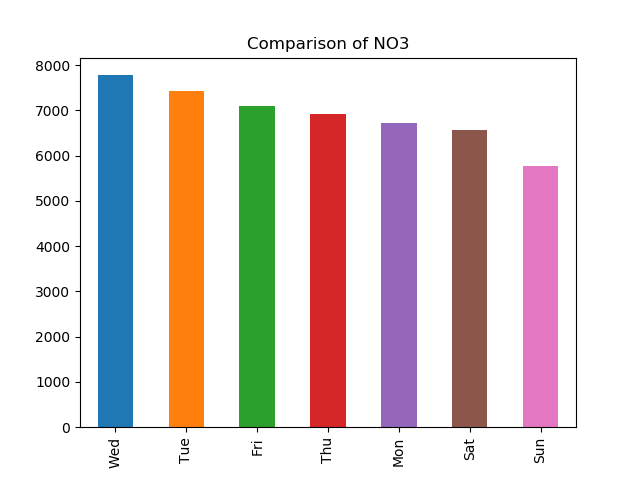

In [46]:
#using matplotlib magic to plot a bar chart of incidents by day of the week -- use with NO3!!
%matplotlib notebook  
# what is this?? special notebook pkg for notebook??
calls['Day_of_Week'].value_counts().plot(kind='bar', title="Comparison of NO3")  # NO3 val against EcoRegion/VPU/ maybe line graph? 
# NO3 in NARS vs. NO3 in catchments ??????????????????????????????????????????????????????????
# add figure title

In [47]:
#using the pyproj library to reproject x,y coordinates from state plane zone II to WGS84 lat/long
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 6722570,1992314
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

-121.43672656313065 38.63153998649104


In [49]:
calls_map = folium.Map(location=[38.58, -121.5], tiles=("https://api.mapbox.com/styles/v1/mapbox/streets-v10/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"),
           zoom_start=11,
          attr='Mapbox attribution')
marker_cluster = plugins.MarkerCluster().add_to(calls_map)
coords_list = []
#to save on memory/time we only call the first 1,000 records to map
for name, row in accident.iloc[:1000].iterrows():   
    x1, y1 =row['X_Coordinate'],row['Y_Coordinate']
    #converts each set coordinates from state plane to lat/long
    long, lat = transform(inProj,outProj,x1,y1)
    coords = (lat,long)
    #add the set of coordinates to the list
    coords_list.append(coords)
    folium.Marker([lat, long], popup="Day of the week was " + row['Day_of_Week']).add_to(marker_cluster)

#saves callsnew.html in the working directory
#calls_map.save('callsnew.html')
calls_map

In [16]:
import os
os.getcwd()
# plugins.HeatMap?
#data : list of points of the form [lat, lng] or [lat, lng, weight]
#    The points you want to plot.
#    You can also provide a numpy.array of shape (n,2) or (n,3).

'/home/rick/projects/2018_GIS_workshop'

In [50]:
calls_heatmap = folium.Map(location=[38.58, -121.5], tiles='Stamen Toner', zoom_start=13)

#create a heatmap using the same data as above
calls_heatmap.add_child(plugins.HeatMap([[item[0], item[1]] for item in coords_list]))
#calls_heatmap.save("heatmap.html")
calls_heatmap

In [16]:
h = gpd.read_file('./hex_sim/hexes2.shp')

In [17]:
h.crs

{'datum': 'NAD83',
 'lat_0': 23,
 'lat_1': 29.5,
 'lat_2': 45.5,
 'lon_0': -96,
 'no_defs': True,
 'proj': 'aea',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

In [18]:
g = h.to_crs({'init':'epsg:4326'})

In [19]:
g.crs

{'init': 'epsg:4326'}

In [33]:
g.to_file('./hex_sim/hexes2.json', driver='GeoJSON')


In [20]:
extent = g.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2
print(lat_Center,lon_Center)

45.64572729528804 -121.92969992482298


In [82]:
stamen_watercolor = folium.Map(location=[lat_Center,lon_Center], tiles="Stamen Terrain", zoom_start=15, attr='@Mapbox')

stamen_watercolor.add_child(folium.GeoJson('./hex_sim/hexes2.json', name='Hexes'))

print(os.path.exists('float_image.png'))
plugins.FloatImage('https://debboutr.github.io/logo2.png', bottom=90, left=8).add_to(stamen_watercolor)

stamen_watercolor.save("watermap.html")

stamen_watercolor

True


In [77]:
plugins.FloatImage?

In [6]:
import os
os.getcwd()

'/home/rick/projects/2018_GIS_workshop'

In [87]:
folium.Div?

In [129]:
stamen_watercolor = folium.Map(location=[lat_Center,lon_Center], tiles=("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"), 
                               zoom_start=14, attr='@Mapbox')

stamen_watercolor.add_child(folium.GeoJson('./hex_sim/hexes2.json', name='Hexes'))

h = ('<div style="position: fixed; bottom: 50px; left: 50px; width:33%; z-index:9999; background-color: rgba(255, 0, 0, 0.4); border-radius: 25px; border: 2px solid #73AD21;">'
        '<h1 style="color:yellow; text-align: center;">Hex Sim</h1>'
#          '<img src="/home/rick/Pictures/epa_clipped.png" alt="no_bueno" width=147 height=147>'
     '</div>')
stamen_watercolor.get_root().html.add_child(folium.Element(h))

stamen_watercolor.save("watermap.html")
stamen_watercolor

In [98]:
folium.Figure?

In [159]:
plugins.HeatMapWithTime?

In [24]:
g.columns

Index(['SITE_ID', 'YEAR_x', 'VISIT_NO_x', 'SITENAME', 'SITETYPE', 'REPEAT',
       'LON_DD', 'LAT_DD', 'XLON_DD', 'XLAT_DD',
       ...
       'SOBC', 'IONSTR', 'BALANCE', 'ORGION', 'CONCAL', 'CONDHO', 'DAY_SHIP',
       'COM_LAB', 'COM_FLD', 'COM_IM '],
      dtype='object', length=128)

In [9]:
heat_data = [[[row['LAT_DD'],row['LON_DD']] for index, row in g[g['NO3'] == i].iterrows()] for i in range(0,13)]



In [27]:
map_hooray = folium.Map(location=[lat_Center,lon_Center],
                    zoom_start = 4)
hm = plugins.HeatMapWithTime(heat_data)
hm.add_to(map_hooray)
# Display the map
map_hooray

In [214]:
type(heat_data[0][0][1])

float

In [25]:
g['new'] = g.NO3.astype('float')

In [26]:
a = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[:50,:].iterrows()]
b = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[51:100,:].iterrows()]
c = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[101:150,:].iterrows()]
d = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[151:200,:].iterrows()]
e = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[201:250,:].iterrows()]
f = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[251:300,:].iterrows()]
h = [[row.LAT_DD,row.LON_DD, row.new] for idx, row in g.loc[301:350,:].iterrows()]
heat_data = [a,b,c,d,e,f,h]

In [199]:
print(len(g))
# g.ix[427]
chem.ix[(chem.SAMPLED != 'Yes')]
# g.NO3.sort_values()
# g = g.drop(427)

1392


SITE_ID  YEAR  VISIT_NO      SAMPLED    DATE_COL DATECHEM TEAM_ID  \
1268  OWW04440-0747  2004         1  Sample lost  10/09/2004                    

     SAMP_LOC PHSTVL PHSTVLF                  ...                  SOBC  \
1268                                          ...                         

     IONSTR BALANCE ORGION CONCAL CONDHO DAY_SHIP COM_LAB COM_FLD  \
1268                                                                

                                   COM_IM   
1268  SITE SAMPLED, NEVER RECEIVED AT LAB   

[1 rows x 68 columns]

In [22]:
g.columns

Index(['Hex_ID', 'Score', 'geometry'], dtype='object')

In [215]:
plugins.HeatMap?